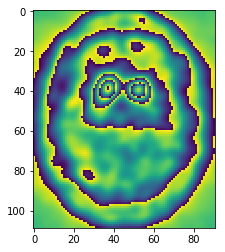

In [37]:
#import statements 
import pydicom
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import uuid
import cv2

#set instance variables
path_pd = "/Users/anacismaru/asr_mac/pd"
path_control = "/Users/anacismaru/asr_mac/control"
PX_SIZE_2D = 64

#matrices that contain numpy arrays of pixel data
images_pd = upload_dicom(path_pd)
# images_control = upload_dicom(path_control)

#normalize images
n_images_pd = normalize(images_pd)
n_images_control = normalize(images_control)

# #determine test and train sets
test_pd, train_pd = divide_arrays(n_images_pd)
test_control, train_control = divide_arrays(n_images_control)

#split images into slices for 2D portion of algorithm
slice_test_pd = slice_dicom(test_pd)
slice_train_pd = slice_dicom(train_pd)
slice_test_control = slice_dicom(test_control)
slice_train_control = slice_dicom(train_control)

#create mean image from slices
mean_test_pd = mean_image(slice_test_pd)
# mean_train_pd = mean_image(slice_train_pd)
# mean_test_control = mean_image(slice_test_control)
# mean_train_control = mean_image(slice_train_control)

#resize 2D images
# resized_test_pd = resize_2D(mean_test_pd, PX_SIZE_2D, PX_SIZE_2D)
# resized_train_pd = resize_2D(mean_train_pd, PX_SIZE_2D, PX_SIZE_2D)
# resized_test_control = resize_2D(mean_test_control, PX_SIZE_2D, PX_SIZE_2D)
# resized_train_control = resize_2D(mean_train_control, PX_SIZE_2D, PX_SIZE_2D)


# #create version directory
# current_directory = os.getcwd()
# version_directory = os.path.join(current_directory, r'preprocessed_data_v2')
# if not os.path.exists(version_directory):
#     os.makedirs(version_directory)
# #create 2D/3D directory
# threeD_directory = os.path.join(version_directory, r'3D')
# if not os.path.exists(threeD_directory):
#     os.makedirs(threeD_directory)
# twoD_directory = os.path.join(version_directory, r'2D')
# if not os.path.exists(twoD_directory):
#     os.makedirs(twoD_directory)

# #Create class directories
# threeD_train_pd_dir = os.path.join(threeD_directory, r'train/pd')
# if not os.path.exists(threeD_train_pd_dir):
#     os.makedirs(threeD_train_pd_dir)
# threeD_test_pd_dir = os.path.join(threeD_directory, r'test/pd')
# if not os.path.exists(threeD_test_pd_dir):
#     os.makedirs(threeD_test_pd_dir)

# twoD_train_pd_dir = os.path.join(twoD_directory, r'train/pd')
# if not os.path.exists(twoD_train_pd_dir):
#     os.makedirs(twoD_train_pd_dir)
# twoD_test_pd_dir = os.path.join(twoD_directory, r'test/pd')
# if not os.path.exists(twoD_test_pd_dir):
#     os.makedirs(twoD_test_pd_dir)
    
# threeD_train_control_dir = os.path.join(threeD_directory, r'train/control')
# if not os.path.exists(threeD_train_control_dir):
#     os.makedirs(threeD_train_control_dir)
# threeD_test_control_dir = os.path.join(threeD_directory, r'test/control')
# if not os.path.exists(threeD_test_control_dir):
#     os.makedirs(threeD_test_control_dir)
    
# twoD_train_control_dir = os.path.join(twoD_directory, r'train/control')
# if not os.path.exists(twoD_train_control_dir):
#     os.makedirs(twoD_train_control_dir)
# twoD_test_control_dir = os.path.join(twoD_directory, r'test/control')
# if not os.path.exists(twoD_test_control_dir):
#     os.makedirs(twoD_test_control_dir)

# #Save all numpy images in respective folders
# for image in test_pd:
#     save_file(image, threeD_test_pd_dir)
# for image in test_control:
#     save_file(image, threeD_test_control_dir)
# for image in train_pd:
#     save_file(image, threeD_train_pd_dir)
# for image in train_control:
#     save_file(image, threeD_train_control_dir)

# for image in mean_test_pd:
#     save_file(image, twoD_test_pd_dir)
# for image in mean_test_control:
#     save_file(image, twoD_test_control_dir)
# for image in mean_train_pd:
#     save_file(image, twoD_train_pd_dir)
# for image in mean_train_control:
#     save_file(image, twoD_train_control_dir)
    
    


In [30]:
#checked and good
def upload_dicom(path):
    PathDicom = path
    lstFilesDCM = []  # create an empty list
    for dirName, subdirList, fileList in os.walk(PathDicom):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM.append(os.path.join(dirName,filename))
    #print(lstFilesDCM[0])   

    #make a array to store all the 3D dicom images, should be 702 long by the end of the program
    images = []

    # loop through all the DICOM files
    for filenameDCM in lstFilesDCM[:2]:   
        # read the file
        ds = pydicom.dcmread(filenameDCM)
        # store the raw image data
        pixel_data = ds.pixel_array
        #convert pixel data to numpy array for one image
        array = pixel_data 
        #append to larger list of images
        images.append(array)
    #return array with dicom files
    return images

In [6]:
#split array into 70% train and 30% test (good)
def divide_arrays(array):
    #determine length of test and train array
    length_array = len(array)
    seventy = round(length_array*0.7)
    thirty = round(length_array*0.3)
    #determine the thirty indexes that will be removed from array and placed into the test_array
    removed_index = random.sample(range(0, len(array)-1), thirty)
    #remove each image at index from array and place into test_array
    test_array = []
    train_array = []
    for index, item in enumerate(array):
        if index in removed_index: #if the index of item appears in removed
            test_array.append(item)
        else:
            train_array.append(item)
    return test_array, train_array
        
    

In [7]:
#split dicom images into slices (good)
def slice_dicom(array):
    twoD = []
    for image in array:
        slices = []
        for z in range(image.shape[0] - 1):
            slices.append(image[z,:,:])
        twoD.append(slices)     
    return twoD
              

In [8]:
#normalize images (cool and good)
def normalize(array):
    array_minmax = []
    for image in array:
        max_value, min_value = image.max(), image.min()
        minmax = (image - min_value)/(max_value - min_value)
        array_minmax.append(minmax)
    return array_minmax

In [9]:
#select slices 35 to 48 from 3D images and create a mean image (cool and good)
def mean_image(array_images):
    mean_images = []
    for image in array_images:
        mean_image = image[34]  #2D
        num_images = 1
        for z in range (35, 47): #check this index is right and doesn't need a new index
            mean_image = mean_image+image[z]
            num_images = num_images + 1
        mean_image = mean_image/num_images
        mean_images.append(mean_image)
    return mean_images

In [10]:
#show slices 30-50 in one figure; slices need to be split beforehand(cool and good) 
def plot_slices(slices):
    fig = plt.figure()
    for num,each_slice in enumerate(slices[30:50]):
        y = fig.add_subplot(4,5, num+1)
        #to resize (if necessary): new_image = cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE, IMG_PX_SIZE))
        y.imshow(each_slice)  #use , cmap='gray' in imshow() to see in grayscale
    plt.show()

In [11]:
#to label images as [0,1] for parkinson's and [1,0] for control (cool and good)
def label_images(array_images, label):
    labeled_slices = []
    for image in array_images:
        if label == 1:
            labeled_slices.append([image, [0,1]])
        elif label == 0: 
            labeled_slices.append([image, [1,0]])
    return labeled_slices

In [12]:
#saves file as numpy
def save_file(image, directory):
    unique = uuid.uuid4()
    file_name = "/" + str(unique)
    print(file_name)
    np.save(directory + file_name, image)

In [19]:
def resize_2D(array_images, pixel_length, pixel_width):
    resized_images = []
    for image in array_images:
        new_img = cv2.resize(image,(pixel_length,pixel_width))
        resized_images.append(new_img)
    return resized_images
